In [2]:
from tensorflow.keras.models import Sequential #instead of import keras.models, due to: https://github.com/keras-team/keras/issues/12379
from tensorflow.keras.layers import Dense
import numpy as np 
# reproducibility goal:
np.random.seed(7)

## <font color='green'> Data extraction directly with numpy </font>

In [3]:
# load pima indians dataset
file_path = r'.\datasets\pima-indians-diabetes.data.csv'
dataset = np.loadtxt(file_path, delimiter=',')
# split into input and output variables
X = dataset[:,0:8]
Y = dataset[:,8]

### The baseline accuracy if all predictions are made as no onset of diabetes is 65.1%. We will use a fully-connected network structure with three layers

## Model creation

In [4]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

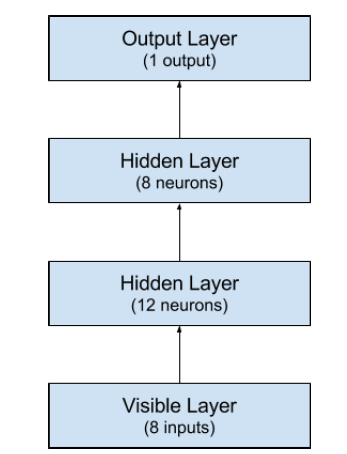

In [5]:
from IPython.display import Image
Image("pics/model_architecture.png", width=3, height=5)

## Model compilation
- logarithmic loss, which for a
binary classication problem is defined in Keras as binary crossentropy
- efficient gradient descent algorithm adam

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model training
- batch_size: number of instances that are evaluated before a weight update
- epochs: number of iterations

In [7]:
model.fit(X, Y, epochs=150, batch_size=10)

Train on 768 samples
Epoch 1/150
768/768 [==============================] - 2s 3ms/sample - loss: 2.5960 - accuracy: 0.5430
Epoch 2/150
768/768 [==============================] - 0s 407us/sample - loss: 1.5434 - accuracy: 0.6185
Epoch 3/150
768/768 [==============================] - 0s 442us/sample - loss: 1.2280 - accuracy: 0.6497
Epoch 4/150
768/768 [==============================] - 0s 430us/sample - loss: 1.0339 - accuracy: 0.6458
Epoch 5/150
768/768 [==============================] - 0s 526us/sample - loss: 0.9322 - accuracy: 0.6484
Epoch 6/150
768/768 [==============================] - 0s 397us/sample - loss: 0.8604 - accuracy: 0.6641
Epoch 7/150
768/768 [==============================] - 0s 389us/sample - loss: 0.8085 - accuracy: 0.6654
Epoch 8/150
768/768 [==============================] - 0s 424us/sample - loss: 0.7787 - accuracy: 0.6602
Epoch 9/150
768/768 [==============================] - 0s 346us/sample - loss: 0.7328 - accuracy: 0.6667
Epoch 10/150
768/768 [==============

## Model evaluation

In [8]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 77.08%


## Model evaluation with cross-validation instead of single train-test split <p>
In this case, we will use the Keras wrapper 'KerasClassifier', together with the sklearn 'cross_val_score', with the steps:
* function to create model, required for KerasClassifier
* dataset elt 
* build the k stratified folds
* train and evaluate via cross validation

In [16]:
# Function to create model, required for KerasClassifier
def create_model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense

    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
# fix random seed for reproducibility
import numpy

seed = 7
numpy.random.seed(seed)
# load pima indians dataset
file_path = r'.\datasets\pima-indians-diabetes.data.csv'
dataset = np.loadtxt(file_path, delimiter=',')
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [11]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [17]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)


In [27]:
from sklearn.model_selection import cross_val_score

results = cross_val_score(model, X, Y, cv=kfold, error_score=np.nan, n_jobs=-1)
print(results.mean())

0.7108680844306946


### Mean accuracy and variance from the k accuracies distribution

In [28]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(results), np.std(results)))

CV accuracy: 0.711 +/- 0.045
